In [4]:
import cv2
import numpy as np
import pytesseract
from pytesseract import image_to_string
from PIL import Image
import matplotlib.pyplot as plt


In [2]:
inWidth = 720
inHeight = 1024
WHRatio = inWidth / float(inHeight)
inScaleFactor = 0.007843
meanVal = 127.5
list1=[]
classNames = ('background',
              'plate')
net=cv2.dnn.readNetFromCaffe('lpr.prototxt','lpr.caffemodel')
def detect_license(img):
    blob = cv2.dnn.blobFromImage(cv2.resize(img,(720,1024)),inScaleFactor, (inWidth, inHeight), meanVal)
    net.setInput(blob)
    detections=net.forward()
    image=img.copy()
    cols=img.shape[1]
    rows=img.shape[0]
    for i in range(detections.shape[2]):
        confidence=detections[0,0,i,2]
        if confidence>0.2:
            class_id=int(detections[0,0,i,1])
            x_leftbottom=int(detections[0,0,i,3]*cols)
            y_leftbottom=int(detections[0,0,i,4]*rows)
            x_righttop=int(detections[0,0,i,5]* cols)
            y_righttop=int(detections[0,0,i,6]*rows)
            image=img[y_leftbottom:y_righttop,x_leftbottom:x_righttop]
            #temp=recogonize(image)
            #list1.append(temp)
        
            cv2.rectangle(img,(x_leftbottom,y_leftbottom),(x_righttop,y_righttop),(255,255,0),5)
            
    return image


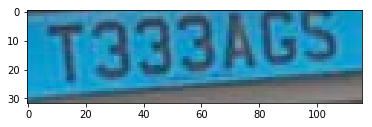

In [3]:
image=cv2.imread('not_at_all.jpg')
plt.imshow(image)
img=detect_license(image)
plt.imshow(img)

ValueError: X.shape[1] = 4176 should be equal to 400, the number of features at training time

In [22]:
from sklearn.externals import joblib
import os


In [28]:

model_dir = os.path.join('SVC_model.pkl')
model = joblib.load(model_dir)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator SVC from version pre-0.18 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: The file 'SVC_model.pkl' has been generated with a joblib version less than 0.10. Please regenerate this pickle file.
  This is separate from the ipykernel package so we can avoid doing imports until


In [34]:
pytesseract.pytesseract.tesseract_cmd = 'C:\\Program Files (x86)\\Tesseract-OCR\\tesseract.exe'



In [40]:
classification_result=[]

In [43]:
print(classification_result)

['', '', '', '', '', '', '', '', '', '']
